## CMS_QCD

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'axes.labelpad': 8.0,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14,
     'errorbar.capsize': 4
    }
    )

In [2]:
data_table_ak4_ybin1 = None
data_table_ak4_ybin2 = None
data_table_ak4_ybin3 = None
data_table_ak4_ybin4 = None
with open( "HEPData/CMS-JHEP12-035-2022-ins1972986-ak4-ybin1.json" ) as f:
    data_table_ak4_ybin1 = json.load( f )
with open( "HEPData/CMS-JHEP12-035-2022-ins1972986-ak4-ybin2.json" ) as f:
    data_table_ak4_ybin2 = json.load( f )
with open( "HEPData/CMS-JHEP12-035-2022-ins1972986-ak4-ybin3.json" ) as f:
    data_table_ak4_ybin3 = json.load( f )
with open( "HEPData/CMS-JHEP12-035-2022-ins1972986-ak4-ybin4.json" ) as f:
    data_table_ak4_ybin4 = json.load( f )

In [3]:
from get_df_json_CMS_QCD import *

df_CMS_QCD_ak4_ybin1 = get_df_json_CMS_QCD( data_table_ak4_ybin1 )
df_CMS_QCD_ak4_ybin2 = get_df_json_CMS_QCD( data_table_ak4_ybin2 )
df_CMS_QCD_ak4_ybin3 = get_df_json_CMS_QCD( data_table_ak4_ybin3 )
df_CMS_QCD_ak4_ybin4 = get_df_json_CMS_QCD( data_table_ak4_ybin4 )

['Jet p_{T} [GeV]', '#sigma [pb/GeV]']
97.0, 133.0, 9375.9 ±43.735 (all uncorr. unc. 1) ±100.46 (AbsoluteMPFBias) ±61.326 (AbsoluteScale) ±0.54818 (fake) ±298.59 (FlavorQCD) ±22.409 (Fragmentation) ±98.103 (JER) ±9.8673 (miss) ±66.009 (PileUpDataMC) ±6.9162 (PileUpPtBB) ±0.47979 (PileUpPtEC1) ±0.011386 (PileUpPtEC2) ±16.19 (PileUpPtRef) ±21.655 (Pref) ±3.5968 (PU) ±70.198 (RelativeBal) ±124.31 (RelativeFSR) ±2.386 (RelativeJEREC1) ±0.39501 (RelativeJEREC2) ±16.309 (RelativePtBB) ±0.02444 (RelativePtEC1) ±0.0055975 (RelativePtEC2) ±116.63 (RelativeSample) ±1.4105 (RelativeStatEC) ±7.1255 (RelativeStatFSR) ±34.572 (SinglePionECAL) ±11.851 (SinglePionHCAL) ±129.87 (TimePtEta) ±112.51 (Lumi) ±29.216 (model)
133.0, 174.0, 2186.6 ±10.571 (all uncorr. unc. 1) ±24.818 (AbsoluteMPFBias) ±15.188 (AbsoluteScale) ±0.023028 (fake) ±59.392 (FlavorQCD) ±3.4193 (Fragmentation) ±18.245 (JER) ±1.7386 (miss) ±11.521 (PileUpDataMC) ±2.3232 (PileUpPtBB) ±0.019871 (PileUpPtEC1) ±0.0014395 (PileUpPtEC2) ±3.1

In [4]:
df_CMS_QCD_ak4_ybin1[ 'X_low' ]

0       97.0
1      133.0
2      174.0
3      220.0
4      272.0
5      330.0
6      395.0
7      468.0
8      548.0
9      638.0
10     737.0
11     846.0
12     967.0
13    1101.0
14    1248.0
15    1410.0
16    1588.0
17    1784.0
18    2000.0
19    2238.0
20    2500.0
21    2787.0
Name: X_low, dtype: float64

In [5]:
df_CMS_QCD_ak4_ybin1['X_high_last'] = df_CMS_QCD_ak4_ybin1['X_high'].iloc[-1]
bins_pt = df_CMS_QCD_ak4_ybin1[['X_low', 'X_high_last']].stack().reset_index(drop=True)
print(np.array(bins_pt))


[  97. 3103.  133. 3103.  174. 3103.  220. 3103.  272. 3103.  330. 3103.
  395. 3103.  468. 3103.  548. 3103.  638. 3103.  737. 3103.  846. 3103.
  967. 3103. 1101. 3103. 1248. 3103. 1410. 3103. 1588. 3103. 1784. 3103.
 2000. 3103. 2238. 3103. 2500. 3103. 2787. 3103.]


In [6]:
def process_data( df ):
    df.loc[ :, 'X_center' ] = ( df.loc[ :, 'X_low' ] + ( df.loc[ :, 'X_high' ] - df.loc[ :, 'X_low' ] ) / 2 )
    ncols = df.columns.size
    df.loc[ :, 'err_tot' ] = np.sqrt( ( df.iloc[ :, 3:ncols ] ** 2 ).sum( axis='columns' ) )
    return df

df_CMS_QCD_ak4_ybin1 = process_data( df_CMS_QCD_ak4_ybin1 )
df_CMS_QCD_ak4_ybin2 = process_data( df_CMS_QCD_ak4_ybin2 )
df_CMS_QCD_ak4_ybin3 = process_data( df_CMS_QCD_ak4_ybin3 )
df_CMS_QCD_ak4_ybin4 = process_data( df_CMS_QCD_ak4_ybin4 )
df_CMS_QCD_ak4_all = {
    'ybin1': df_CMS_QCD_ak4_ybin1,
    'ybin2': df_CMS_QCD_ak4_ybin2,
    'ybin3': df_CMS_QCD_ak4_ybin3,
    'ybin4': df_CMS_QCD_ak4_ybin4
}

In [7]:
df_CMS_QCD_ak4_all[ 'ybin1' ]

,X_low,X_high,val,all uncorr. unc. 1,AbsoluteMPFBias,AbsoluteScale,fake,FlavorQCD,Fragmentation,JER,...,RelativeStatEC,RelativeStatFSR,SinglePionECAL,SinglePionHCAL,TimePtEta,Lumi,model,X_high_last,X_center,err_tot
0,97.0,133.0,9375.900000,43.735000,1.004600e+02,6.132600e+01,5.481800e-01,2.985900e+02,2.240900e+01,9.810300e+01,...,1.410500e+00,7.125500e+00,3.457200e+01,1.185100e+01,1.298700e+02,1.125100e+02,2.921600e+01,3103.0,115.0,3134.988189
1,133.0,174.0,2186.600000,10.571000,2.481800e+01,1.518800e+01,2.302800e-02,5.939200e+01,3.419300e+00,1.824500e+01,...,4.671600e-02,1.765600e+00,4.664300e+00,1.753700e+00,3.524000e+01,2.623900e+01,1.152700e+00,3103.0,153.5,3108.141966
2,174.0,220.0,604.760000,2.575200,7.245100e+00,4.372100e+00,3.249200e-03,1.463600e+01,5.135600e-01,4.714300e+00,...,1.351300e-02,5.131500e-01,6.236300e-01,2.435200e-01,1.077000e+01,7.257200e+00,1.195900e+00,3103.0,197.0,3109.341257
3,220.0,272.0,187.910000,0.910950,2.347300e+00,1.403600e+00,1.488400e-03,4.075800e+00,3.995400e-02,1.376300e+00,...,5.574300e-03,1.663100e-01,5.999000e-02,9.329300e-03,3.605300e+00,2.255000e+00,5.622800e-01,3103.0,246.0,3112.744538
4,272.0,330.0,62.720000,0.290450,8.065700e-01,4.841600e-01,3.434600e-04,1.206500e+00,2.559700e-02,4.364800e-01,...,1.429300e-03,5.759200e-02,3.221500e-02,2.005500e-02,1.278700e+00,7.526400e-01,2.149200e-01,3103.0,301.0,3117.565669
5,330.0,395.0,22.311000,0.092298,2.937600e-01,1.768300e-01,4.337700e-05,3.755800e-01,2.088000e-02,1.495200e-01,...,2.740200e-04,2.116900e-02,2.423800e-02,1.280700e-02,4.860500e-01,2.677400e-01,6.651800e-02,3103.0,362.5,3124.102423
6,395.0,468.0,8.396100,0.032499,1.130400e-01,6.818100e-02,7.773700e-06,1.213900e-01,1.200800e-02,5.353600e-02,...,2.549600e-05,8.207000e-03,1.335500e-02,7.164200e-03,1.940200e-01,1.007500e-01,1.843300e-02,3103.0,431.5,3132.858335
7,468.0,548.0,3.245400,0.013168,4.472300e-02,2.701100e-02,7.912200e-06,3.934400e-02,6.143500e-03,1.945200e-02,...,9.135100e-06,3.259400e-03,6.645200e-03,3.618300e-03,7.902600e-02,3.894400e-02,5.680100e-03,3103.0,508.0,3144.308034
8,548.0,638.0,1.300900,0.004346,1.839900e-02,1.112000e-02,3.299600e-06,1.276800e-02,3.033000e-03,7.262900e-03,...,6.330600e-06,1.342200e-03,3.246800e-03,1.773000e-03,3.320900e-02,1.561000e-02,2.052800e-03,3103.0,593.0,3159.154634
9,638.0,737.0,0.527360,0.001762,7.683200e-03,4.649600e-03,7.798400e-07,3.966800e-03,1.450500e-03,2.735500e-03,...,1.873600e-06,5.582900e-04,1.565300e-03,8.438500e-04,1.405800e-02,6.328300e-03,7.475300e-04,3103.0,687.5,3178.248771


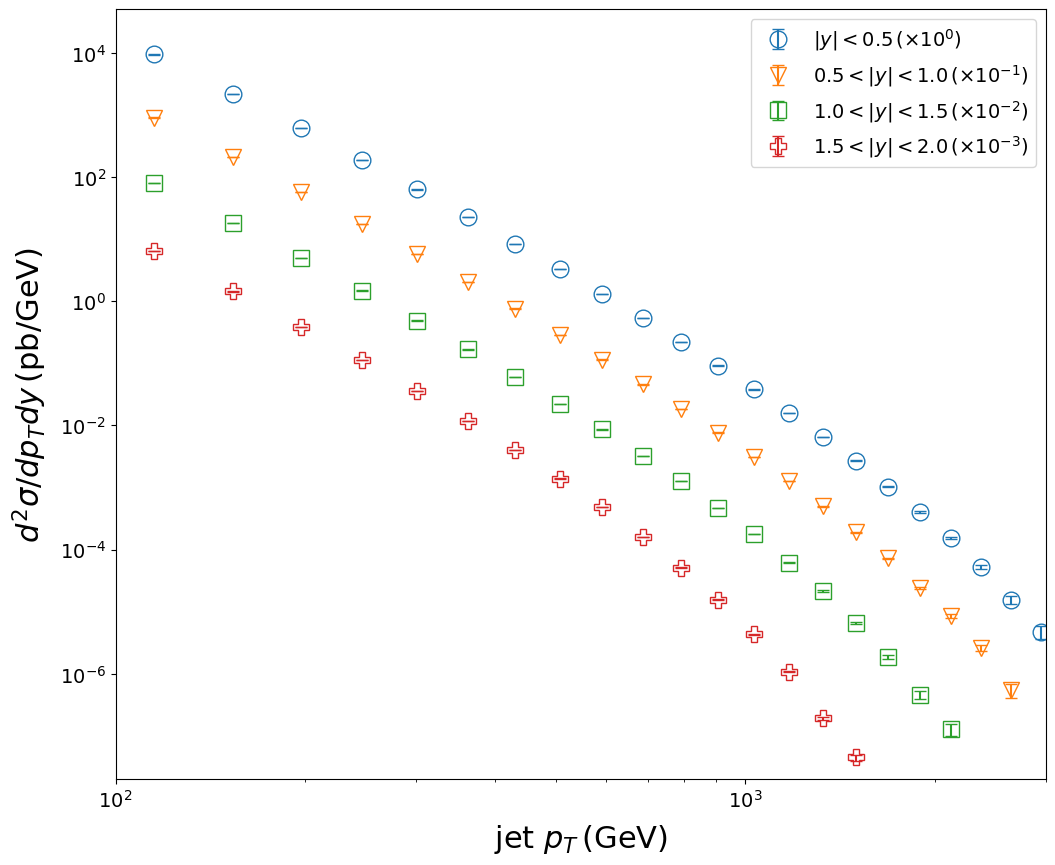

In [8]:
fig = plt.figure( figsize=(12,10) )
markers = [ 'o', 'v', 's', 'P' ]
factors = {
    'ybin1': 1e+00,
    'ybin2': 1e-01,
    'ybin3': 1e-02,
    'ybin4': 1e-03,
}
labels = {
    'ybin1': r"$|y| < 0.5 \,(\times 10^0)$",
    'ybin2': r"$0.5 < |y| < 1.0 \,(\times 10^{-1})$",
    'ybin3': r"$1.0 < |y| < 1.5 \,(\times 10^{-2})$",
    'ybin4': r"$1.5 < |y| < 2.0 \,(\times 10^{-3})$",
}
for idx__, key__ in enumerate( df_CMS_QCD_ak4_all ):
    df__ = df_CMS_QCD_ak4_all[ key__ ]
    X__   = df__.loc[ :, 'X_center' ]
    val__ = df__.loc[ :, 'val' ]
    err__ = df__.iloc[ :, 3 ]
    plt.errorbar( X__, ( val__ * factors[ key__ ] ), yerr=( err__ * factors[ key__ ] ), label=labels[ key__ ], marker=markers[ idx__ % len( markers ) ], fillstyle='none', markersize=12, linestyle='none' )

plt.xlabel( r'jet $p_T\,(\rm{GeV})$' )
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )

plt.xlim( 1e+02, 3e+03 )
plt.ylim( 2e-08, 5e+04 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='best' )


## Plot com runs de 50000 eventos

In [9]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from joblib import dump, load
import scipy.stats
plt.style.use(mplhep.style.CMS)
import matplotlib.font_manager
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'axes.labelpad': 8.0,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
print ( mpl.rcParams )

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 8.0
axes.labelsize: 22.0
axes.labelweight: normal
axes.linewidth: 2.0
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.r

In [10]:
from read_root import *

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 8.0
axes.labelsize: 22.0
axes.labelweight: normal
axes.linewidth: 2.0
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.r

In [11]:
df_ptbin1 = read_root("process_90_500.root", "T") # 90 a 500
df_ptbin2 = read_root("process_500_1000.root", "T") # 500 a 1000
df_ptbin3 = read_root("process_1000_1500.root", "T") # 1000 a 1500
df_ptbin4 = read_root("process_1500_2000.root", "T") # 1500 a 2000

#print(df_ptbin1)





['n_mu', 'mu_pt', 'mu_px', 'mu_py', 'mu_pz', 'mu_eta', 'mu_phi', 'mu_energy', 'mu_mass', 'n_e', 'e_pt', 'e_px', 'e_py', 'e_pz', 'e_eta', 'e_phi', 'e_energy', 'e_mass', 'n_proton', 'proton_px', 'proton_py', 'proton_pz', 'proton_pt', 'proton_energy', 'proton_xi', 'proton_t', 'proton_weight', 'proton_acc', 'n_jet', 'jet_px', 'jet_py', 'jet_pz', 'jet_pt', 'jet_eta', 'jet_rap', 'jet_phi', 'jet_energy']
['n_mu', 'mu_pt', 'mu_px', 'mu_py', 'mu_pz', 'mu_eta', 'mu_phi', 'mu_energy', 'mu_mass', 'n_e', 'e_pt', 'e_px', 'e_py', 'e_pz', 'e_eta', 'e_phi', 'e_energy', 'e_mass', 'n_proton', 'proton_px', 'proton_py', 'proton_pz', 'proton_pt', 'proton_energy', 'proton_xi', 'proton_t', 'proton_weight', 'proton_acc', 'n_jet', 'jet_px', 'jet_py', 'jet_pz', 'jet_pt', 'jet_eta', 'jet_rap', 'jet_phi', 'jet_energy']
['n_mu', 'mu_pt', 'mu_px', 'mu_py', 'mu_pz', 'mu_eta', 'mu_phi', 'mu_energy', 'mu_mass', 'n_e', 'e_pt', 'e_px', 'e_py', 'e_pz', 'e_eta', 'e_phi', 'e_energy', 'e_mass', 'n_proton', 'proton_px', 'prot

In [12]:
df_ptbins = {
    'ptbin1': df_ptbin1,
    'ptbin2': df_ptbin2,
    'ptbin3': df_ptbin3,
    'ptbin4': df_ptbin4
}

df_ptbins[ 'ptbin1' ]

,pt,eta,rap,phi,px,py,pz,energy
event_number,,,,,,,,
1,102.817364,-1.485009,-1.458482,0.493006,90.573295,48.660955,-215.325491,239.955113
1,95.886606,-0.287540,-0.285004,4.165352,-49.876296,-81.893810,-27.952768,100.719662
1,33.903507,-3.306447,-3.292818,2.310233,-22.846627,25.049539,-461.958268,463.235080
1,32.343206,-2.312943,-2.286786,6.205243,32.245014,-2.518342,-161.799301,165.174001
1,24.045192,-3.325697,-3.276340,3.671211,-20.751002,-12.147723,-334.017025,334.971195
...,...,...,...,...,...,...,...,...
499999,10.353788,-2.456925,-2.343565,0.322521,9.819942,3.281718,-59.964868,61.080065
500000,138.871057,2.238174,2.229798,5.902886,128.949236,-51.548668,643.635252,658.699394
500000,86.576436,-1.011035,-1.007085,3.120113,-86.556465,1.859469,-103.225218,135.013735


In [13]:
# Atualizado
cross_section = { # pb
    'ptbin1': 1.9697e+06,
    'ptbin2': 573,
    'ptbin3': 9.055,
    'ptbin4': 0.4748
}

n_events = {
    'ptbin1': 500000,
    'ptbin2': 500000,
    'ptbin3': 500000,
    'ptbin4': 500000
}

norm = {}
for key__ in cross_section:
    norm[ key__ ] = cross_section[ key__ ] / n_events[ key__ ]

norm

{'ptbin1': 3.9394,
 'ptbin2': 0.001146,
 'ptbin3': 1.811e-05,
 'ptbin4': 9.496e-07}

In [14]:
bins = [  97. , 133. , 174. , 220. , 272. , 330. , 395. , 468. , 548. , 638. , 737. , 846. ,
         967. , 1101. , 1248. , 1410. , 1588. , 1784. , 2000. , 2238. , 2500. , 2787. , 3103. ]
bins = np.array( bins )

bin_centres = ( bins[:-1] + bins[1:] ) / 2

bin_widths = ( bins[1:] - bins[:-1] )

print ( bins ) 
print ( bin_centres )
print ( bin_widths )

[  97.  133.  174.  220.  272.  330.  395.  468.  548.  638.  737.  846.
  967. 1101. 1248. 1410. 1588. 1784. 2000. 2238. 2500. 2787. 3103.]
[ 115.   153.5  197.   246.   301.   362.5  431.5  508.   593.   687.5
  791.5  906.5 1034.  1174.5 1329.  1499.  1686.  1892.  2119.  2369.
 2643.5 2945. ]
[ 36.  41.  46.  52.  58.  65.  73.  80.  90.  99. 109. 121. 134. 147.
 162. 178. 196. 216. 238. 262. 287. 316.]


In [15]:
#def process_select_data( df ):
    #df__ = df
    #selection__ = ( ( df__.Status == 1 ) & ( df__.PT >= bins[0] ) & ( df__.PT < bins[-1] ) )
    #df_sel__ = df__[ selection__ ]
    #return df_sel__

def process_select_data(df):
    df__ = df
    selection__ = ((df__.pt >= bins[0]) & (df__.pt < bins[-1]))
    df_sel__ = df__[selection__]
    return df_sel__


In [16]:
ybins = np.array( [0., 0.5, 1.0, 1.5, 2.0 ] )
ymin = ybins[:-1]
ymax = ybins[1:]
print ( ymin )
print ( ymax )

[0.  0.5 1.  1.5]
[0.5 1.  1.5 2. ]


In [17]:
#Atualizado Rapidity = rap e PT = pt
histos = {}
for key__ in df_ptbins:
    df_ptbins[ key__ ] = process_select_data( df_ptbins[ key__ ] )
    df__ = df_ptbins[ key__ ]
    for idx_y__ in range( len(ymin) ):
        msk__ = ( ( np.abs( df__.rap ) >= ymin[ idx_y__ ] ) & ( np.abs( df__.rap ) < ymax[ idx_y__ ] ) )
        counts__, bins = np.histogram(df__.pt[msk__], bins=bins)
        histos_key__ = 'ybin'+str(idx_y__+1)
        if histos_key__ not in histos.keys():
            histos[ histos_key__ ] = ( counts__ * norm[ key__ ]  )
        else:
            histos[ histos_key__ ] += ( counts__ * norm[ key__ ] )
histos


{'ybin1': array([2.69946559e+05, 9.85309467e+04, 3.11776124e+04, 1.05288742e+04,
        4.27709499e+03, 1.68584955e+03, 6.72747538e+02, 2.75223330e+02,
        1.15975036e+02, 6.88579412e+01, 2.45637972e+01, 1.16485332e+01,
        5.49797599e+00, 2.49767151e+00, 1.11144565e+00, 4.93264579e-01,
        2.11944736e-01, 7.89727572e-02, 1.00656056e-02, 1.58928920e-03,
        2.52593600e-04, 3.22864000e-05]),
 'ybin2': array([2.56363856e+05, 9.14760954e+04, 2.96501490e+04, 1.03330522e+04,
        3.79770249e+03, 1.52838206e+03, 6.86988618e+02, 2.06598739e+02,
        1.18445154e+02, 5.11358922e+01, 2.09116632e+01, 9.63744973e+00,
        4.40181448e+00, 1.88736789e+00, 8.32606638e-01, 3.39012172e-01,
        1.34596451e-01, 4.67429884e-02, 4.85848520e-03, 6.02249200e-04,
        7.59680000e-05, 6.64720000e-06]),
 'ybin3': array([2.34531868e+05, 8.17710849e+04, 2.58906456e+04, 8.63016163e+03,
        3.32754333e+03, 1.10890950e+03, 4.68412644e+02, 1.85742748e+02,
        6.75624470e+01, 4

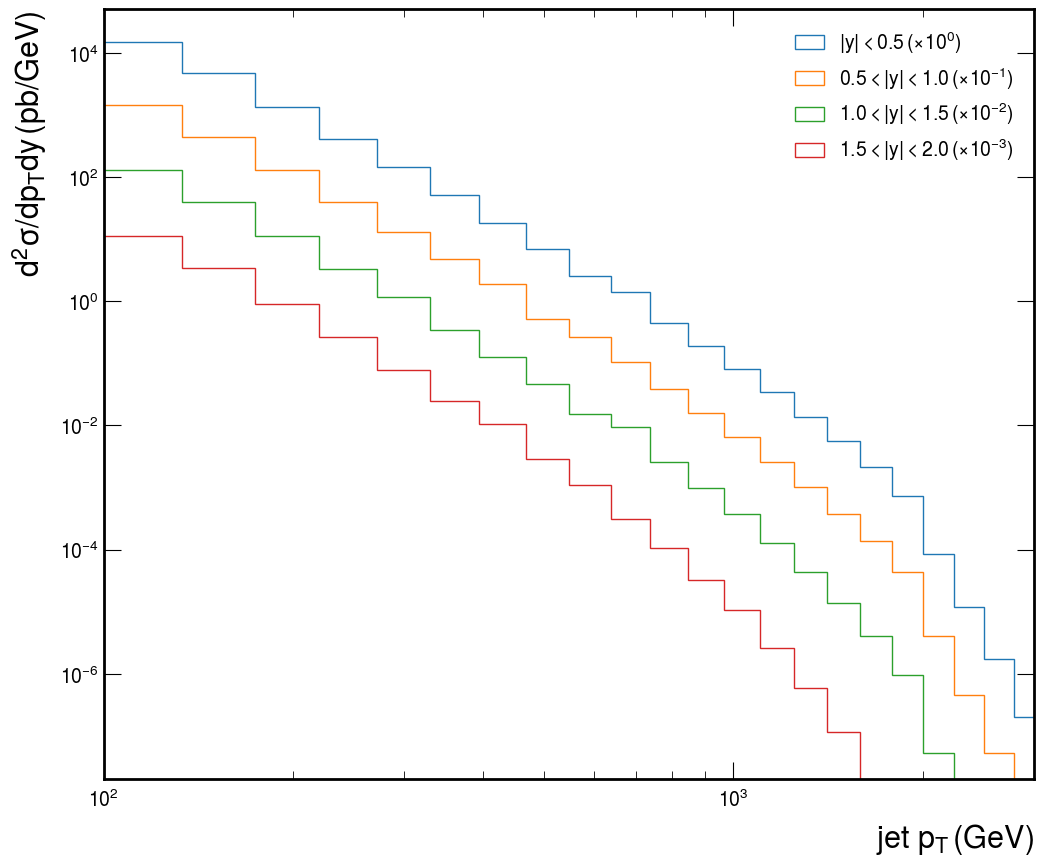

In [18]:
fig = plt.figure( figsize=(12,10) )

factors = {
    'ybin1': 1e+00,
    'ybin2': 1e-01,
    'ybin3': 1e-02,
    'ybin4': 1e-03,
}
labels = {
    'ybin1': r"$|y| < 0.5 \,(\times 10^0)$",
    'ybin2': r"$0.5 < |y| < 1.0 \,(\times 10^{-1})$",
    'ybin3': r"$1.0 < |y| < 1.5 \,(\times 10^{-2})$",
    'ybin4': r"$1.5 < |y| < 2.0 \,(\times 10^{-3})$",
}

for key__ in histos:
    plt.hist( bin_centres, weights=( ( histos[ key__ ] / bin_widths / 0.5 ) * factors[ key__ ] ), bins=bins, label=labels[ key__ ], histtype='step' )

plt.xlabel( r'jet $p_T\,(\rm{GeV})$' )
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )

plt.xlim( 1e+02, 3e+03 )
plt.ylim( 2e-08, 5e+04 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='best' )

In [19]:
df_ptbins[ 'ptbin1' ]

,pt,eta,rap,phi,px,py,pz,energy
event_number,,,,,,,,
1,102.817364,-1.485009,-1.458482,0.493006,90.573295,48.660955,-215.325491,239.955113
4,116.383435,0.243592,0.241538,2.820853,-110.448181,36.692005,28.631322,120.833807
5,124.430630,-0.004215,-0.004178,1.011927,65.976601,105.499146,-0.524525,125.553649
5,104.227314,-1.108749,-1.104905,3.976880,-69.932853,-77.283434,-140.737816,175.428001
6,142.493882,-0.068161,-0.067606,5.598773,110.402954,-90.087148,-9.720074,143.993509
...,...,...,...,...,...,...,...,...
499995,178.992554,0.017292,0.017000,2.685996,-160.735084,78.756380,3.095246,182.096039
499997,101.417259,-0.501060,-0.491600,5.931005,95.192567,-34.983362,-52.969324,116.292125
499998,106.410903,-1.146477,-1.131999,5.633171,84.711096,-64.399615,-150.535804,185.456949


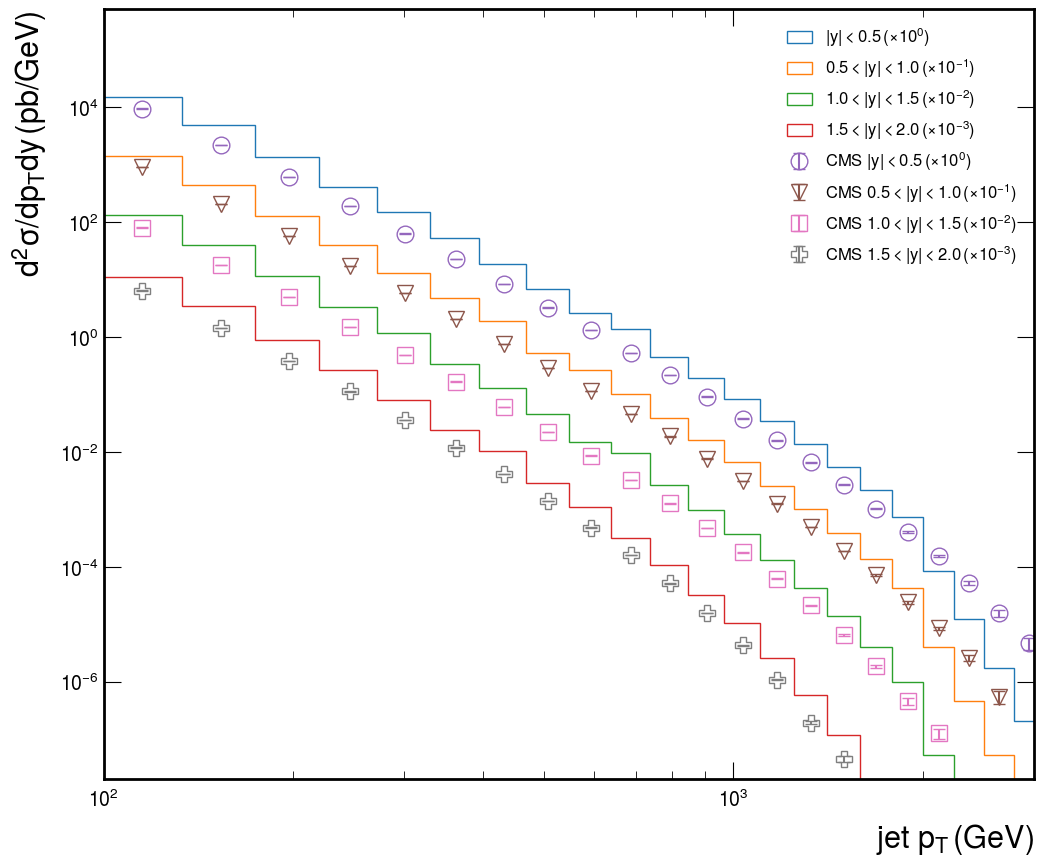

In [20]:
fig = plt.figure( figsize=(12,10) )

factors = {
    'ybin1': 1e+00,
    'ybin2': 1e-01,
    'ybin3': 1e-02,
    'ybin4': 1e-03,
}
labels = {
    'ybin1': r"$|y| < 0.5 \,(\times 10^0)$",
    'ybin2': r"$0.5 < |y| < 1.0 \,(\times 10^{-1})$",
    'ybin3': r"$1.0 < |y| < 1.5 \,(\times 10^{-2})$",
    'ybin4': r"$1.5 < |y| < 2.0 \,(\times 10^{-3})$",
}

for key__ in histos:
    plt.hist( bin_centres, weights=( ( histos[ key__ ] / bin_widths / 0.5 ) * factors[ key__ ] ), bins=bins, label=labels[ key__ ], histtype='step' )

plt.xlabel( r'jet $p_T\,(\rm{GeV})$' )
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )

plt.xlim( 1e+02, 3e+03 )
plt.ylim( 2e-08, 5e+04 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='best' )

##

markers = [ 'o', 'v', 's', 'P' ]

# factors = {
#     'ybin1': 1e+00,
#     'ybin2': 1e-01,
#     'ybin3': 1e-02,
#     'ybin4': 1e-03,
# }

labels_data = {
    'ybin1': r"CMS $|y| < 0.5 \,(\times 10^0)$",
    'ybin2': r"CMS $0.5 < |y| < 1.0 \,(\times 10^{-1})$",
    'ybin3': r"CMS $1.0 < |y| < 1.5 \,(\times 10^{-2})$",
    'ybin4': r"CMS $1.5 < |y| < 2.0 \,(\times 10^{-3})$",
}
for idx__, key__ in enumerate( df_CMS_QCD_ak4_all ):
    df__ = df_CMS_QCD_ak4_all[ key__ ]
    X__   = df__.loc[ :, 'X_center' ]
    val__ = df__.loc[ :, 'val' ]
    err__ = df__.iloc[ :, 3 ]
    plt.errorbar( X__, ( val__ * factors[ key__ ] ), yerr=( err__ * factors[ key__ ] ), label=labels_data[ key__ ], marker=markers[ idx__ % len( markers ) ], fillstyle='none', markersize=12, linestyle='none' )

plt.xlabel( r'jet $p_T\,(\rm{GeV})$' )
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )

plt.xlim( 1e+02, 3e+03 )
# plt.ylim( 2e-08, 5e+04 )
plt.ylim( 2e-08, 5e+05 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='upper right', fontsize=12 )